In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [3]:
#datos segunda parte (1 min, 3 min, 5min)
Segunda =np.array([[254.4,241.4,219],[709.4,717.4,696.4],[1227.4,1222.4,1185]])

#datos tercera parte (3cm, 5cm, 7cm, 9cm, 11cm)
tercera = np.array([[339.4,342.4,325.4],[254.4,241.4,219.4],[97.4,107.4,109.4],[57.4,62.4,83.4],[61.4,38.4,39.4]])

#datos ultima parte (sola,papel,aluminio,plomo)
cuarta = np.array([1211.6,761.15,602.65,126.65])

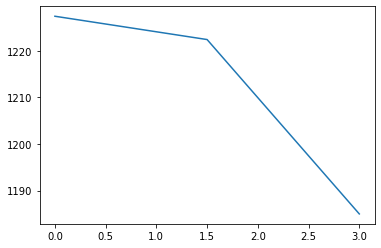

In [7]:
#como fluctuan los datos de un mismo tiempo
x=np.linspace(0,3,3)
plt.plot(x,Segunda[2])

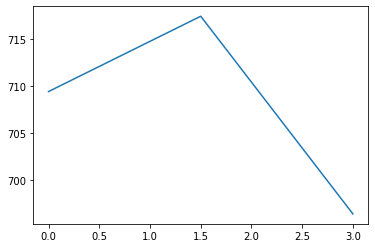

In [8]:
plt.plot(x,Segunda[1])

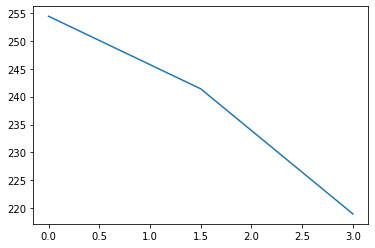

In [9]:
plt.plot(x,Segunda[0])

In [4]:
muestras = np.array([335.73,238.4,104.73,67.73,46.4])
x =np.array([3,5,7,9,11])
frecuencias = muestras 
a=np.sum(muestras)

lamda = a*np.e**(-0.26*x) 

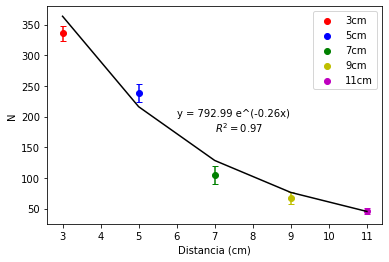

In [163]:
#como varia la frecuencia con respecto a la distancia
#se cumple la teoria
#primera muestra
#plt.plot(x,frecuencias,color='k')
plt.scatter(x[0],frecuencias[0],color='r',label='3cm')
plt.scatter(x[1],frecuencias[1],color='b',label='5cm')
plt.scatter(x[2],frecuencias[2],color='g',label='7cm')
plt.scatter(x[3],frecuencias[3],color='y',label='9cm')
plt.scatter(x[4],frecuencias[4],color='m',label='11cm')

plt.errorbar(x[0],frecuencias[0],yerr=12,capsize=3,color='r')
plt.errorbar(x[1],frecuencias[1],yerr=15,capsize=3,color='b')
plt.errorbar(x[2],frecuencias[2],yerr=15,capsize=3,color='g')
plt.errorbar(x[3],frecuencias[3],yerr=10,capsize=3,color='y')
plt.errorbar(x[4],frecuencias[4],yerr=5,capsize=3,color='m')

plt.ylabel('N')
plt.xlabel('Distancia (cm)')

plt.plot(x,lamda,color='k')
plt.text(6,200,'y = {} e^({}x)'.format(a,-0.26))
plt.text(7,175,r'$R^2 = {}$'.format(0.97))
plt.legend()

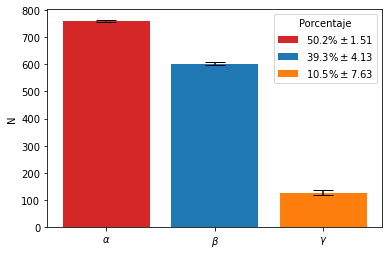

In [9]:
x = [r"$\alpha$", r"$\beta$", r"$\gamma$"]
y = [cuarta[1], cuarta[2], cuarta[3]]
labels = [r"$50.2\% \pm 1.51$", r"$39.3\% \pm 4.13$", r"$10.5\% \pm 7.63$"]
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
error = [4, 5, 10]

plt.bar(x[0], y[0], color=bar_colors[0],yerr=error[0],capsize = 10,label=labels[0])
plt.bar(x[1], y[1], color=bar_colors[1],yerr=error[1],capsize = 10,label=labels[1])
plt.bar(x[2], y[2], color=bar_colors[2],yerr=error[2],capsize = 10,label=labels[2])
plt.ylabel('N')
plt.legend(title='Porcentaje')


**Interferometría**

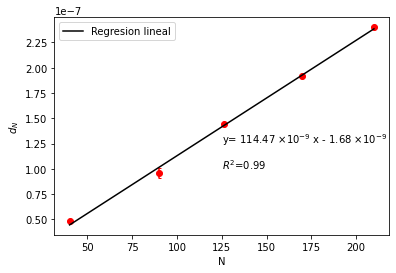

In [98]:
x=np.array([40,90,126,170,210])
y=np.array([24*2e-9,48*2e-9,72*2e-9,96*2e-9,120*2e-9])

def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)
    
    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

_x = np.linspace(np.min(x),np.max(x),2)
param = GetFit(x,y)
ym = GetModel(_x,param)


plt.scatter(x[0],y[0],color='r')
plt.scatter(x[1],y[1],color='r')
plt.errorbar(x[1],y[1],color='r',yerr=0.05e-7,capsize=1.5,fmt='.')
plt.scatter(x[2],y[2],color='r')
plt.scatter(x[3],y[3],color='r')
plt.scatter(x[4],y[4],color='r')

plt.plot(_x,ym,color='k',label = "Regresion lineal")

plt.text(125,1.25e-7, r'y= 114.47 $\times 10^{-9}$ x - 1.68 $\times 10^{-9}$')
plt.text(125,1e-7, r'$R^2$={}'.format(0.99))

plt.xlabel('N')
plt.ylabel(r'$d_N$')
plt.legend()

In [78]:
n=2
N=3
l = x.shape[0]
A = np.ones((l,n+1))
for i in range(1,n+1):
        A[:,i] = x**i
A=A[:,1:3]
R = y - np.dot(A,param)
sigma2 = np.dot( R.T, R )/(N-len(param))
CVar = sigma2*np.linalg.inv(np.dot(A.T,A))
param

array([-1.06879073e-09,  1.14047791e-09])

In [77]:
np.sqrt(np.diag(CVar))

array([8.31126411e-07, 4.68657105e-09])

In [81]:
np.sqrt(sigma2)

6.282992709057867e-05